<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/16Apr20_1_From%20Perfect%20to%20to%20Not%20Perfect%20lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From Perfect to Not Perfect Lab

### Introduction

In this lab, we'll practice our Python and Numpy skills, while seeing what happens as we introduce error into our model.

### Starting up

Let's say that we want to model the amount of ticket sales of the opening night of a musical artist at Madison Square Garden.  We will assume that we know the underlying or true model, which is the following:

$tickets\_sold = .12*weekly\_music\_streams - 10000$

Begin by creating a vector of 100 feature variables ranging from $200,000$ to $350,000$.  Use numpy's random generator with a seed of 3.  Assign the result to the variable `weekly_streams`.

In [0]:
import numpy.random as random
random.seed(3)
weekly_streams = random.randint(200000, 350000, 100)


In [0]:
weekly_streams[:3]
# array([271530, 277049, 248056])

array([271530, 277049, 248056])

Then use numpy to create the number of ticket sales for each feature variable according to the model defined above.  The number should be rounded to the nearest integer.

In [0]:
tickets_sold = [.12 * x - 10000 for x in weekly_streams]

In [0]:
tickets_sold[:3]

[22583.6, 23245.879999999997, 19766.719999999998]

Then perform the same calculation using list comprehension in Python.

> No numpy should be used in the below statement.

In [0]:
import numpy as np

In [0]:
tickets_sold_py = .12 * tickets_sold - 10000

TypeError: ignored

In [0]:
tickets_sold_py[:3]
# [22584.0, 23246.0, 19767.0]

NameError: ignored

Ok, now let's fit a a linear regression model called `perfect_model` using the feature and target variables defined above.

> You can use the numpy arrays to do so.

In [0]:
weekly_streams[:3]

array([271530, 277049, 248056])

In [0]:
# Let's reshape weekly_streams and initialize it to X
X = weekly_streams.reshape(-1, 1)
X[:3]

array([[271530],
       [277049],
       [248056]])

In [0]:
# Initialize `tickets_sold` to y
y = tickets_sold
y[:3]

[22583.6, 23245.879999999997, 19766.719999999998]

In [0]:
from sklearn.linear_model import LinearRegression

perfect_model = LinearRegression().fit(X, y)

Then calculate the score of the model.

In [0]:
perfect_model.score(X, y)
# 0.9999999961855224

1.0

And also calculate the root mean squared error using sklearn metrics.

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y, perfect_model.predict(X)))
# 0.31460270684722097

4.729372449219227e-12

> We see a small amount of error because we rounded our data above.

### Adding Error

Ok, now let's add some error to our data and see how our model performs.  Initialize error for each observation ranging from negative 3000 to positive 3000.  Use a seed of 2.

In [0]:
random.seed(2)
random_errors = random.randint(-3000, 3000, 100)
random_errors[:3]
# array([-425, 2704,  606])

array([-425, 2704,  606])

Add the errors to the our target variables using numpy.

In [0]:
tickets_with_errors = tickets_sold + random_errors

In [0]:
tickets_with_errors[:3]
# array([22602., 23111., 19689.])

array([22158.6 , 25949.88, 20372.72])

Now let's see how our previously trained model performs when our new `tickets_with_errors` data.  Calculate the score for with the new data.

In [0]:
perfect_model.score(X, tickets_with_errors)
# 0.8906120056548548

0.8906122733742218

Now plot both the model's predictions and the data with error matplotlib.

In [0]:
# Display `perfect_model.predict(X)`
perfect_model.predict(X).shape

(100,)

In [0]:
# The `predict()` gives you the prediction of y. You're inputting X into it. The prediction line plot will take both X and prediction values.
predictions = perfect_model.predict(X)
predictions[:3]

array([22583.6 , 23245.88, 19766.72])

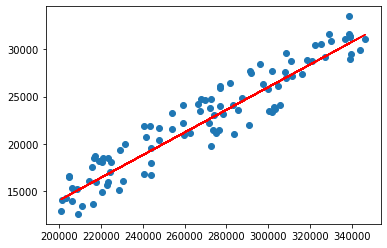

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X, tickets_with_errors)
ax.plot(X, predictions, 'r-')
plt.show()

> Answer: <img src="https://github.com/jigsawlabs-student/train-test-split/blob/master/minor-error.png?raw=1" width="50%">

Now let's see how our model performs if we increase the error from between -3000 to 3000, to -5000 to 5000.  Assign the new targets to `tickets_larger_error`.

In [0]:

import numpy as np
random.seed(3)
tickets_larger_error = np.random.randint(-5000, 5000, 100)+ tickets_with_errors
tickets_larger_error[:3]

# array([24920., 20821., 21404.])

array([23152.6 , 22637.88, 25231.72])

Calculate the score.

In [0]:
perfect_model.score(X, tickets_larger_error)
# 0.7853455211240589

0.674553599557519

So we can see that the larger the built in random error, the lower the score.  And there is nothing we can do about it.

Then, once again, plot the model's predictions along side the new `tickets_larger_error` data.

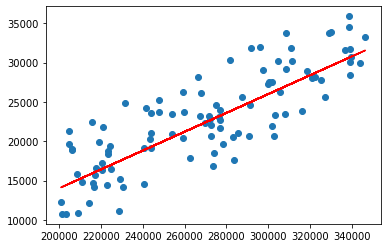

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X, tickets_larger_error)
ax.plot(X, predictions, 'r-')
plt.show()

> Answer: <img src="https://github.com/jigsawlabs-student/train-test-split/blob/master/larger-error.png?raw=1" width="50%">

So the predictions are the same, it's just the data. that has more error in it.

### Bonus

You likely generated the `tickets_larger_error` in numpy.  Try adding the error to each target variable, this time with list comprehension.

In [0]:
# Difference
y[:3]

[22583.6, 23245.879999999997, 19766.719999999998]

In [0]:
# Example
#[x + y for x in l2 for y in l1 ]

In [0]:
np.random.seed(2)
larger_errors = np.random.randint(-5000, 5000, 100)

tickets_larger_errors = [i+j for i in y for j in larger_errors]
tickets_larger_errors[:3]
# [24920.0, 20821.0, 21404.0]

[24919.6, 20158.6, 24220.6]